Imports

In [1]:
import sys
import os
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

repo_root = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

import psp

/tscc/nfs/home/ydoctor/miniconda3/envs/perturb_seq_env/lib/python3.11/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML


In [2]:
# Reload the package
import sys
# Remove the main package if it's in sys.modules
if 'psp' in sys.modules:
    del sys.modules['psp']

# Remove any submodules of psp
for mod in list(sys.modules.keys()):
    if mod.startswith('psp.'):
        del sys.modules[mod]
import psp

## Analysis on Strong Perturbations

Here, the first analysis we will perform is on all strong perturbations (defined as having significant DEGs and significant etest), regardless of wether they are "coherent" perturbations or not. Even if there is 1 sgRNA, this still may be a valid representation of perturbing that gene. We will later perform further analysis exclusively on "coherent" perturbations (i.e. have multiple sgRNAs targeting the same gene with similarity between them).

### Computing the pairwise energy distance between perturbations

In [3]:
adata = psp.utils.read_anndata("/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/KOLF_Chromatin_Modifiers_Energy_Test_Gene_Level_DEG_Etest_Filtered.h5ad")
edist_df, var_df = psp.da.compute_pairwise_edist_replicates(adata, perturbation_key='gene_target', key_added='gene_pairwise_edist', n_reps=100)
edist_df.to_csv('/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/output_files/KOLF_Chromatin_Modifiers_Pairwise_Edist.csv')

Pairwise edist replicates:   0%|          | 0/100 [00:00<?, ?it/s]

Stored replicate results in adata.uns['gene_pairwise_edist']


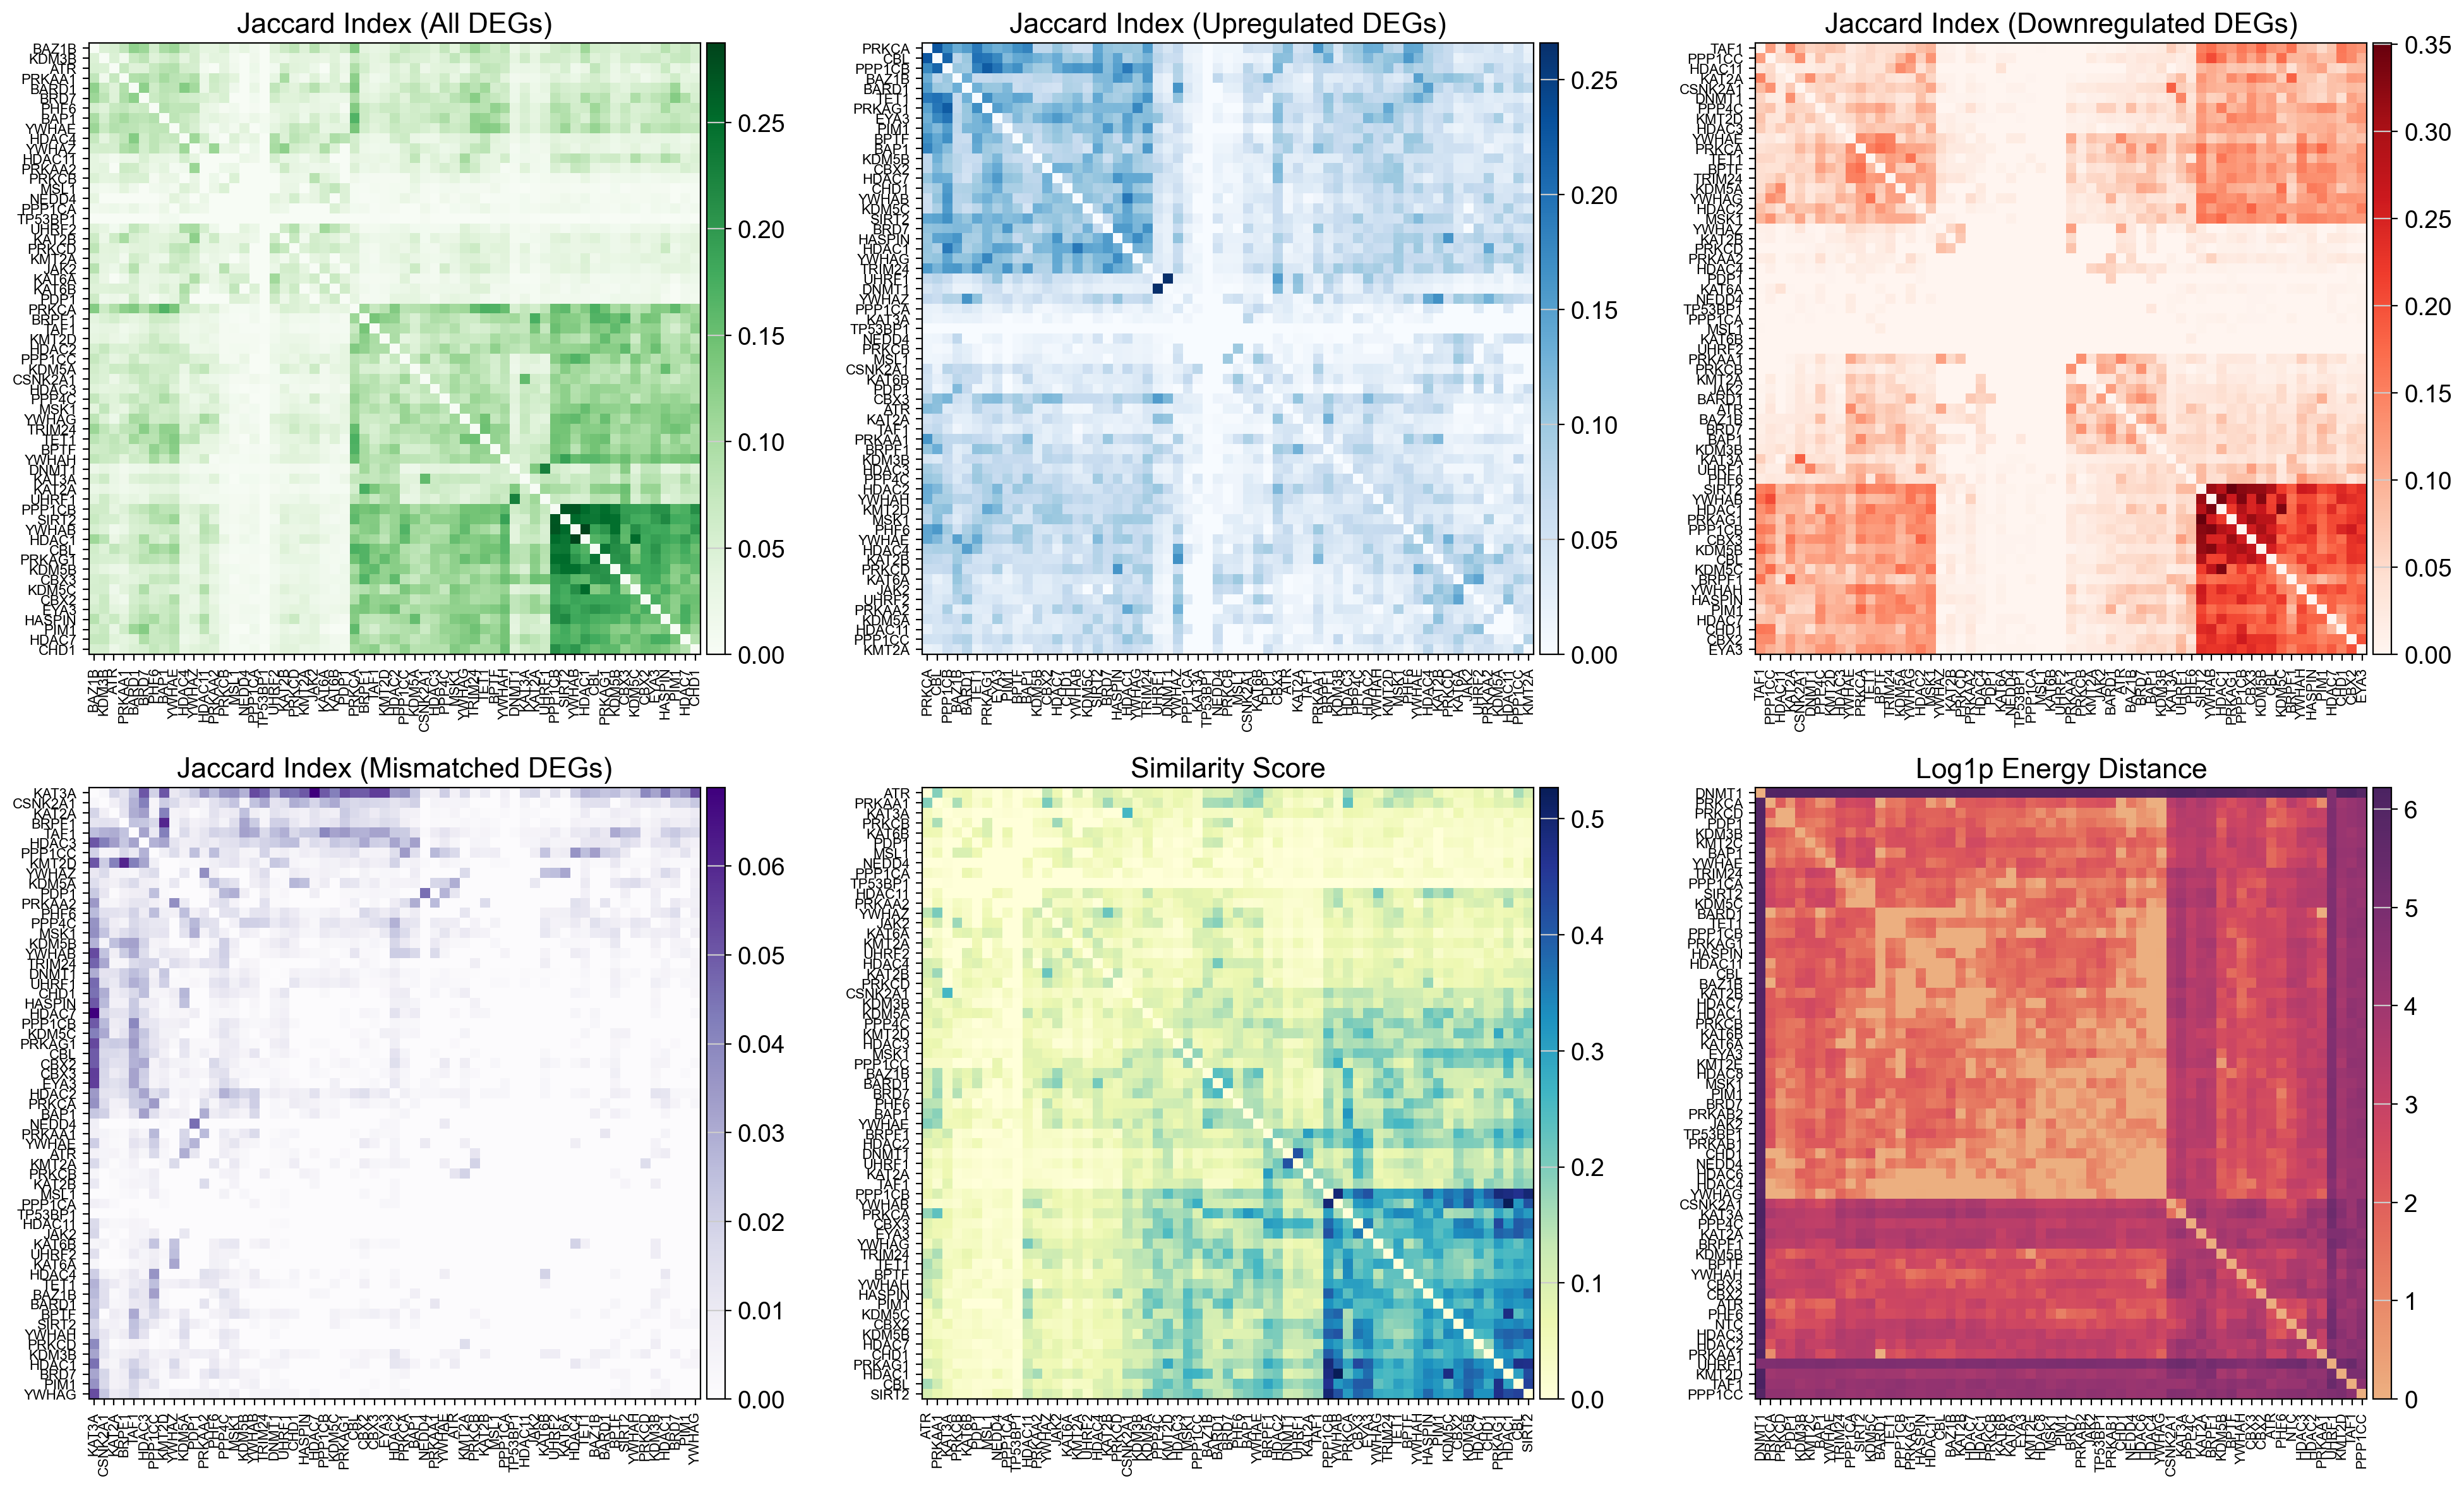

In [4]:
edist_df = pd.read_csv('/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/output_files/KOLF_Chromatin_Modifiers_Pairwise_Edist.csv', index_col=0)
DEGs = pd.read_csv('/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/output_files/KOLF_Chromatin_Modifiers_DEG_per_gene.csv')
save_path = '/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/output_files/KOLF_Chromatin_Modifiers_Correlation_Matrices.svg'
fig = psp.pl.plot_corrrelation_matrices(deg_df=DEGs, edistance_df=edist_df, save_path=save_path)